In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("exams_mod.csv")

In [4]:
df.describe()

,math score,reading score,writing score,id_student,address,Year,Age
count,1010.000000,1010.000000,1010.000000,1010.000000,0.0,1010.000000,943.000000
mean,66.420792,64.930693,70.289109,1494.599010,NaN,2021.104950,15.483563
std,15.481187,18.990769,19.125831,291.537945,NaN,7.681396,1.151707
min,13.000000,15.000000,23.000000,1000.000000,NaN,1990.000000,14.000000
25%,56.000000,54.000000,58.000000,1242.250000,NaN,2023.000000,14.000000
50%,66.000000,68.000000,68.000000,1494.500000,NaN,2023.000000,16.000000
75%,77.000000,78.000000,79.000000,1746.750000,NaN,2023.000000,17.000000
max,120.000000,100.000000,100.000000,1999.000000,NaN,2023.000000,17.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1010 non-null   object 
 1   race/ethnicity               1010 non-null   object 
 2   parental level of education  1010 non-null   object 
 3   lunch                        1010 non-null   object 
 4   test preparation course      1010 non-null   object 
 5   math score                   1010 non-null   int64  
 6   reading score                1010 non-null   int64  
 7   writing score                1010 non-null   int64  
 8   id_student                   1010 non-null   int64  
 9   address                      0 non-null      float64
 10  Year                         1010 non-null   int64  
 11  Age                          943 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 94.8+ KB


In [ ]:
#OBSERVACIONES: El id student es un entero y no deberia serlo.

In [ ]:
#aplicamos un código para contabilizar los valores nulos por cada columna del Dataframe

In [6]:
df.isna().sum() 

gender                            0
race/ethnicity                    0
parental level of education       0
lunch                             0
test preparation course           0
math score                        0
reading score                     0
writing score                     0
id_student                        0
address                        1010
Year                              0
Age                              67
dtype: int64

In [ ]:
#Observamos que la columna 'adress' tiene 1010 valores nulos así como la columna 'Age' tiene 67 valores nulos

In [7]:
df['id_student']=df['id_student'].astype(str)

In [8]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'id_student', 'address', 'Year', 'Age'],
      dtype='object')

In [9]:
to_explore=['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']

In [ ]:
#Dado que "id_student es un integer procedemos a cambiarlo a objeto"

In [11]:
df['id_student'] = df['id_student'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1010 non-null   object 
 1   race/ethnicity               1010 non-null   object 
 2   parental level of education  1010 non-null   object 
 3   lunch                        1010 non-null   object 
 4   test preparation course      1010 non-null   object 
 5   math score                   1010 non-null   int64  
 6   reading score                1010 non-null   int64  
 7   writing score                1010 non-null   int64  
 8   id_student                   1010 non-null   object 
 9   address                      0 non-null      float64
 10  Year                         1010 non-null   int64  
 11  Age                          943 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 94.8+ KB


In [12]:
# Do value counts on columns that are of type object
for col in df.columns: 
    if df[col].dtype == 'object':
        if df[col].nunique() < 10: 
            print(col)
            print(df[col].value_counts())
            print()
        else:
            print('It was not shown: {}'.format(col))

gender
male      373
female    337
FEMALE    103
MALE       97
Male       54
Female     46
Name: gender, dtype: int64

race/ethnicity
group C    324
group D    265
group B    206
group E    134
group A     81
Name: race/ethnicity, dtype: int64

parental level of education
some college          225
high school           206
associate's degree    204
some high school      192
bachelor's degree     113
master's degree        70
Name: parental level of education, dtype: int64

lunch
standard        659
free/reduced    351
Name: lunch, dtype: int64

test preparation course
none         672
completed    338
Name: test preparation course, dtype: int64

It was not shown: id_student


In [12]:
df['gender'].str.lower() #convertimos la columna 'gender' a minusculas

0         male
1       female
2         male
3         male
4         male
         ...  
1005    female
1006    female
1007      male
1008      male
1009      male
Name: gender, Length: 1010, dtype: object

In [13]:
df['gender'] = df['gender'].str.lower()
df['gender'].value_counts()   #contamos los valores únicos de la columna gender.

male      524
female    486
Name: gender, dtype: int64

In [14]:
df.isna().sum() #devuelve la suma de valores nuelos del df, en este caso adress y Age tienen valores nulos

gender                            0
race/ethnicity                    0
parental level of education       0
lunch                             0
test preparation course           0
math score                        0
reading score                     0
writing score                     0
id_student                        0
address                        1010
Year                              0
Age                              67
dtype: int64

In [ ]:
#Contamos los valores por años, y bueno observamos que dentro de la base existen valores desde 1970, lo cual no tiene sentido

In [14]:
df['Year'].value_counts()

2023    952
1990     58
Name: Year, dtype: int64

In [ ]:
#procedmeos a eliminar aquellos estudiantes ligados a años muy antiguos y nos quedamos con aquellos que corresponden al 2023

In [15]:
df = df[df['Year'] != 1990]
df['Year'].value_counts()

2023    952
Name: Year, dtype: int64

In [ ]:
#eliminar adress

In [38]:
df.drop(['address'],axis=1,inplace=True) #eliminanos la columna adress dado que no aporta valor.

In [39]:
df['Age'].fillna(df['Age'].mean(),inplace=True) #reemplazos los valores nuelos en la columna Age.

In [ ]:
#procedemos a quitar los duplicados del dataset

In [40]:
df=df.drop_duplicates()

In [41]:
df.shape #deberia quedar 1000

(941, 11)

# PROCEDEMOS A REVISAR LA COLUMNA MATCH SCORE

In [42]:
df[df['math score'] > 100]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,Year,Age


In [23]:
df['math score'].describe()

count    941.000000
mean      66.217853
std       15.447865
min       13.000000
25%       55.000000
50%       66.000000
75%       77.000000
max      100.000000
Name: math score, dtype: float64

In [43]:
df = df[df['math score'] <= 100]
df['math score'].describe()

count    941.000000
mean      66.217853
std       15.447865
min       13.000000
25%       55.000000
50%       66.000000
75%       77.000000
max      100.000000
Name: math score, dtype: float64

In [ ]:
#HAY UN PROBLEMA CON EL AÑO vamos a quitar los años menores a 2023

In [44]:
age_un = df['Age'].unique() #vamos a revisr los valores únicos de la columna age.
age_un

array([14.        , 17.        , 16.        , 15.        , 15.49662921])

In [45]:
age_nonan = age_un[~np.isnan(age_un)]
age_nonan

array([14.        , 17.        , 16.        , 15.        , 15.49662921])

In [46]:
fill_list = np.random.choice(age_nonan, df['Age'].isna().sum())
fill_list

array([], dtype=float64)

In [47]:
nan_indices = df['Age'].index[df['Age'].isna()] 
df.loc[nan_indices, 'Age'] = fill_list[:len(nan_indices)]

In [48]:
df['Age'].isna().sum()

0

# Con los pasos previos hemos limpiado la base de datos a fin de empezar a analizar las gráficas que permitan obtener una relación entre variables.

In [33]:
import matplotlib.pyplot as plt #Importamos la libreria para gráficos

Categorical Variable: gender


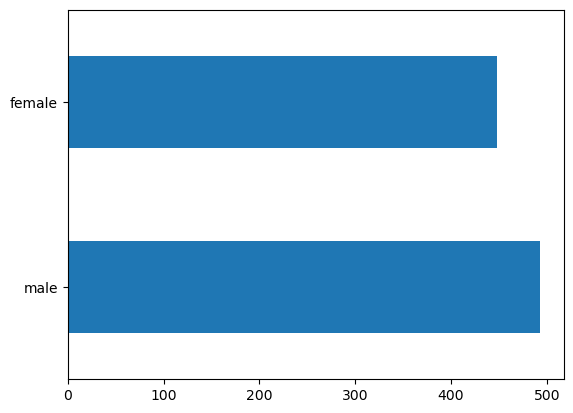

Categorical Variable: race/ethnicity


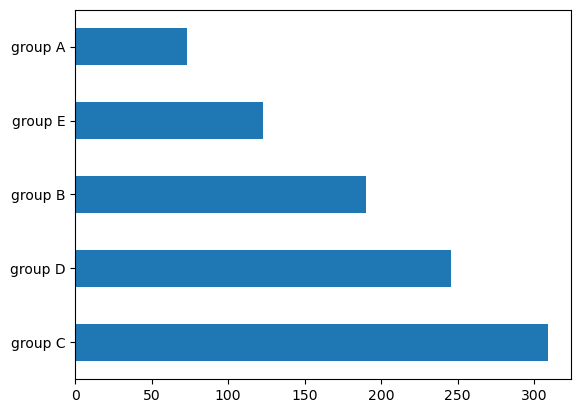

Categorical Variable: parental level of education


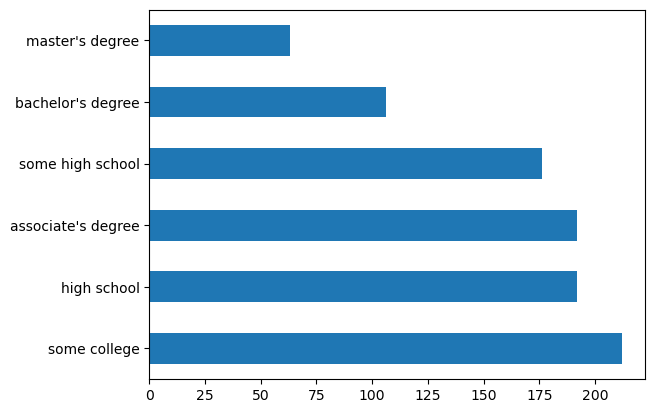

Categorical Variable: lunch


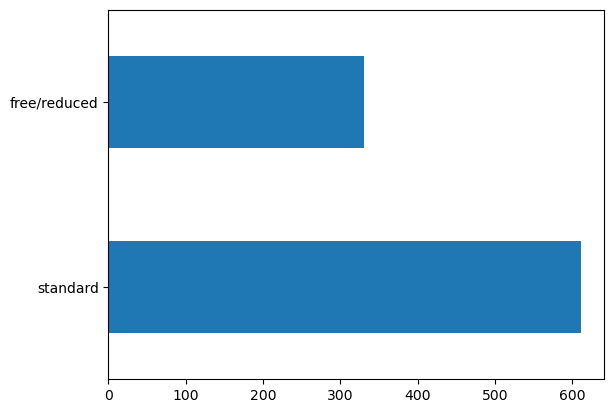

Categorical Variable: test preparation course


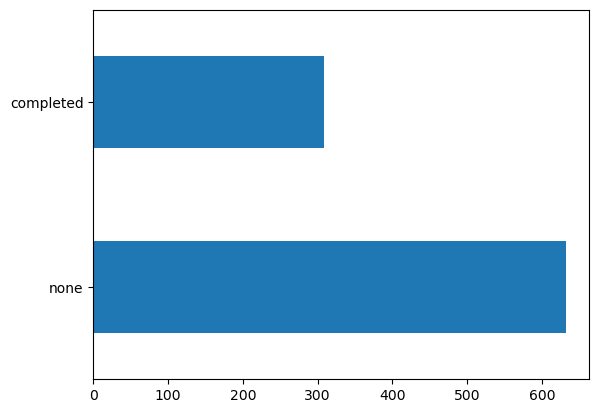

Numerical Variable: math score


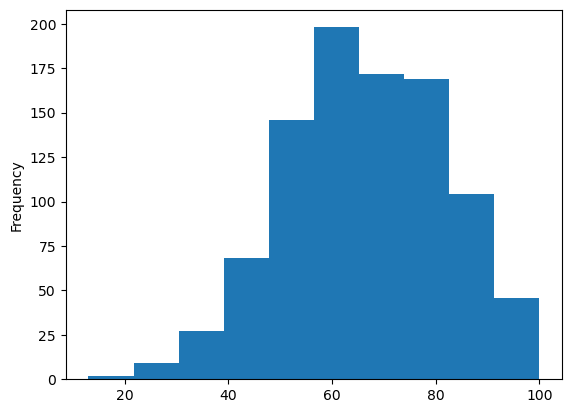

Numerical Variable: reading score


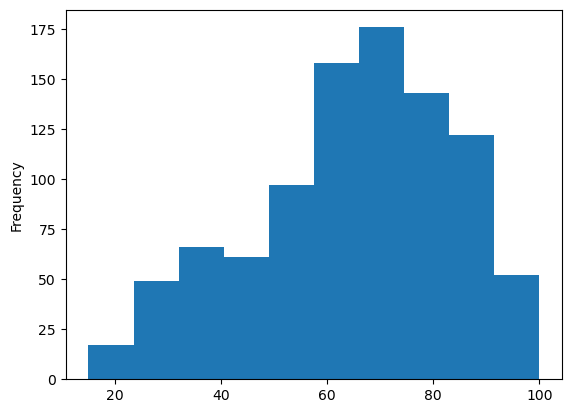

Numerical Variable: writing score


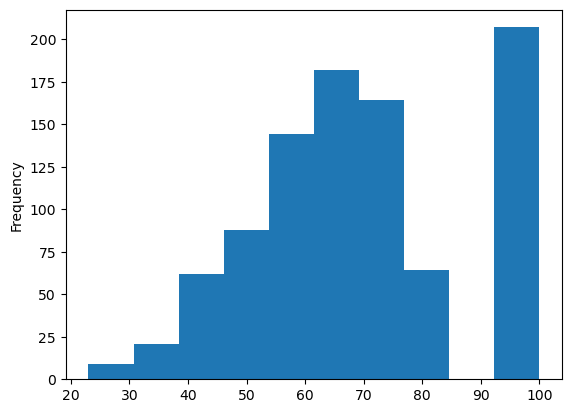

Numerical Variable: Year


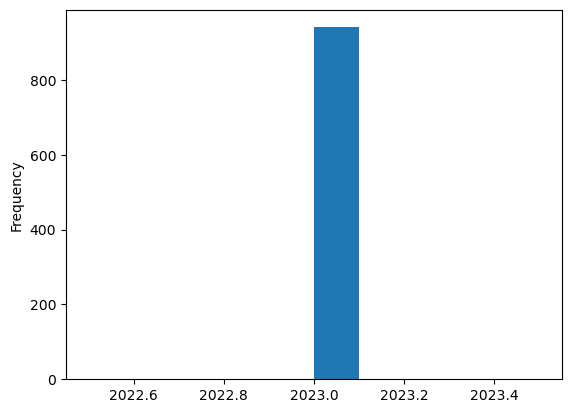

Numerical Variable: Age


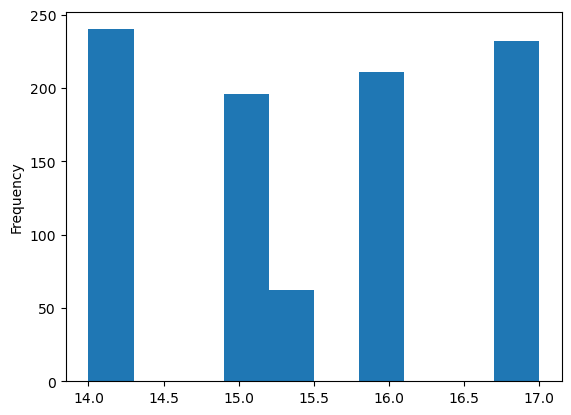

In [49]:
for col in df.columns:
    if df[col].dtype == 'O' and col != 'id_student':
        df[col].value_counts().plot(kind='barh') #cambiamos a barras horizontales.
        print(f'Categorical Variable: {col}')
        plt.show()
    else:
        if col != 'id_student':
            df[col].plot(kind='hist')
            print(f'Numerical Variable: {col}')
            plt.show()

In [ ]:
procedemos a verificar el data set despues de las modificaciones

In [50]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,Year,Age
0,male,group A,high school,standard,completed,67,67,63,1000,2023,14.0
1,female,group D,some high school,free/reduced,none,40,29,55,1001,2023,17.0
2,male,group E,some college,free/reduced,none,59,60,50,1002,2023,14.0
3,male,group B,high school,standard,none,77,78,68,1003,2023,17.0
4,male,group E,associate's degree,standard,completed,78,73,68,1004,2023,16.0


In [51]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
id_student                     0
Year                           0
Age                            0
dtype: int64

In [ ]:
#El ID y el año no son relevantes para el análisis por lo que procedemos a eliminarlos

In [52]:
df = df.drop(columns=['id_student', 'Year'], axis=1)

In [53]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Age
0,male,group A,high school,standard,completed,67,67,63,14.0
1,female,group D,some high school,free/reduced,none,40,29,55,17.0
2,male,group E,some college,free/reduced,none,59,60,50,14.0
3,male,group B,high school,standard,none,77,78,68,17.0
4,male,group E,associate's degree,standard,completed,78,73,68,16.0


In [ ]:
#Vamos a asumir que la variables nota es el principal problema por lo que vamos a relacionarlo con el resto de variables

In [56]:
import seaborn as sns

gender


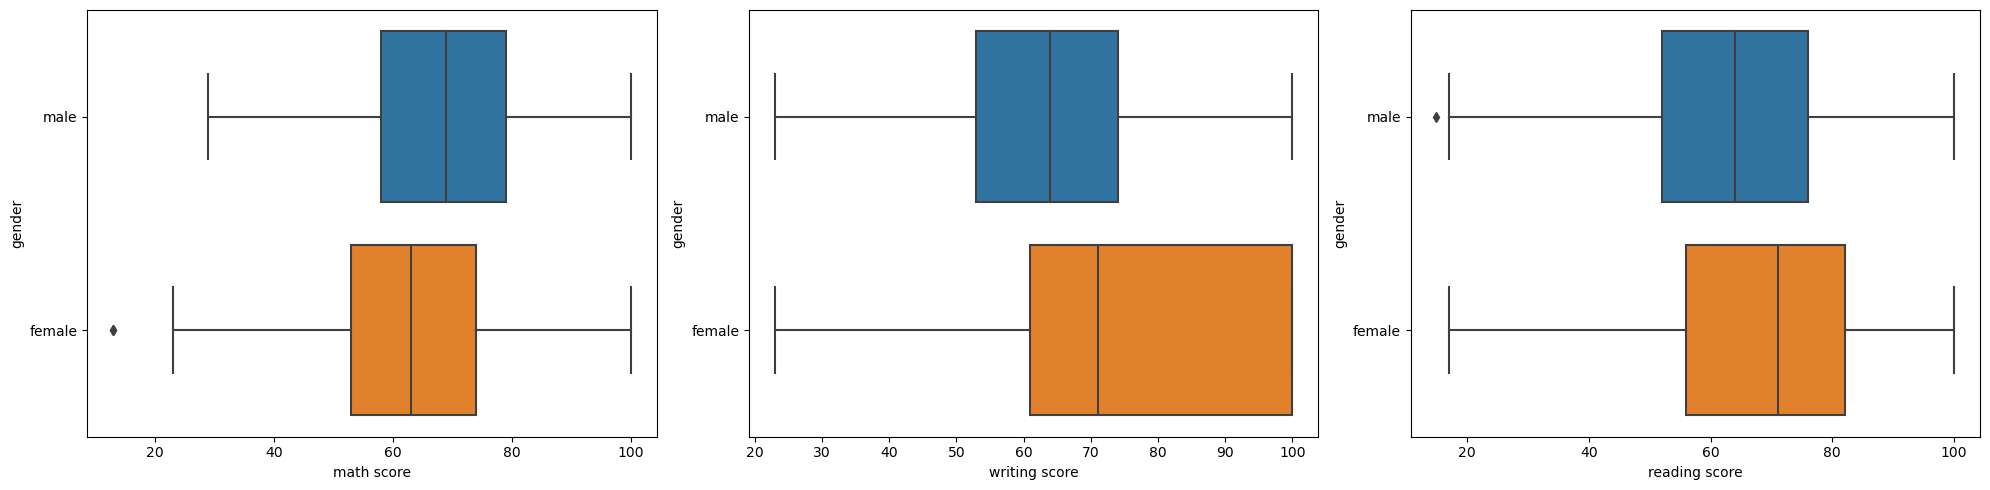

race/ethnicity


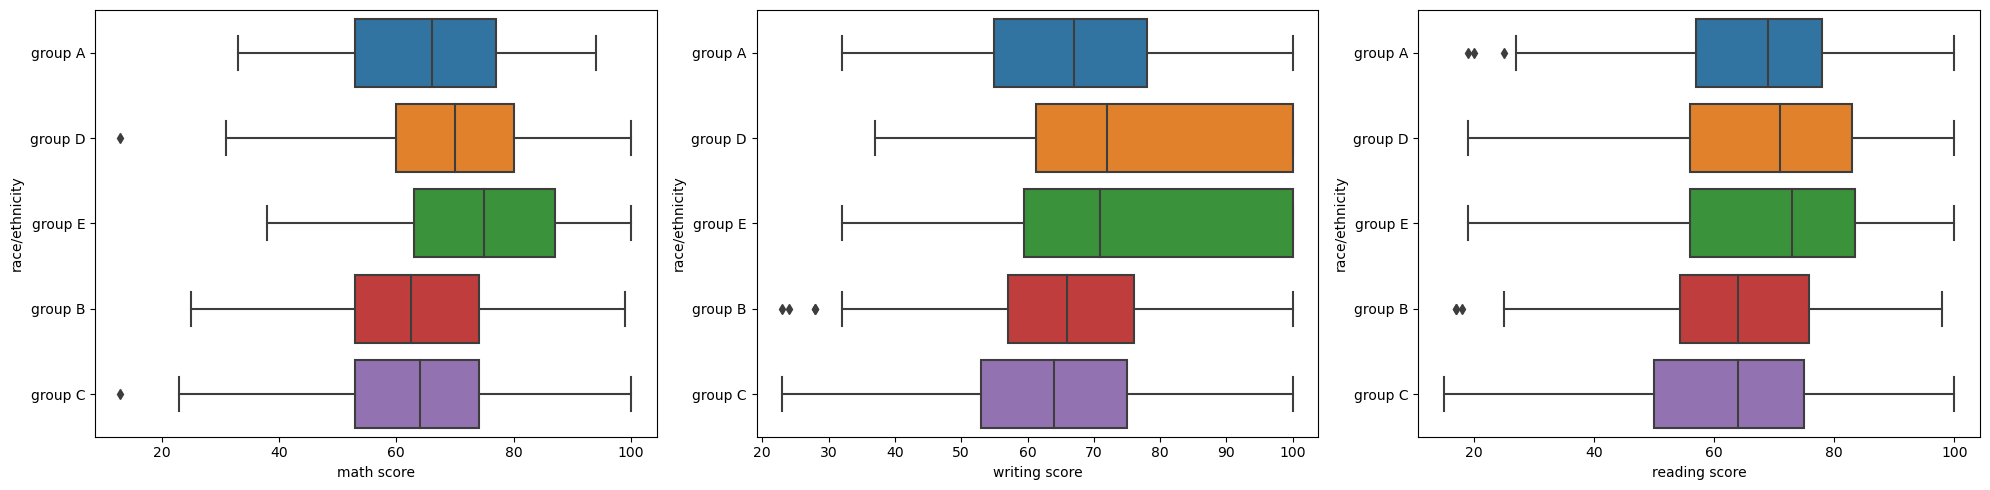

parental level of education


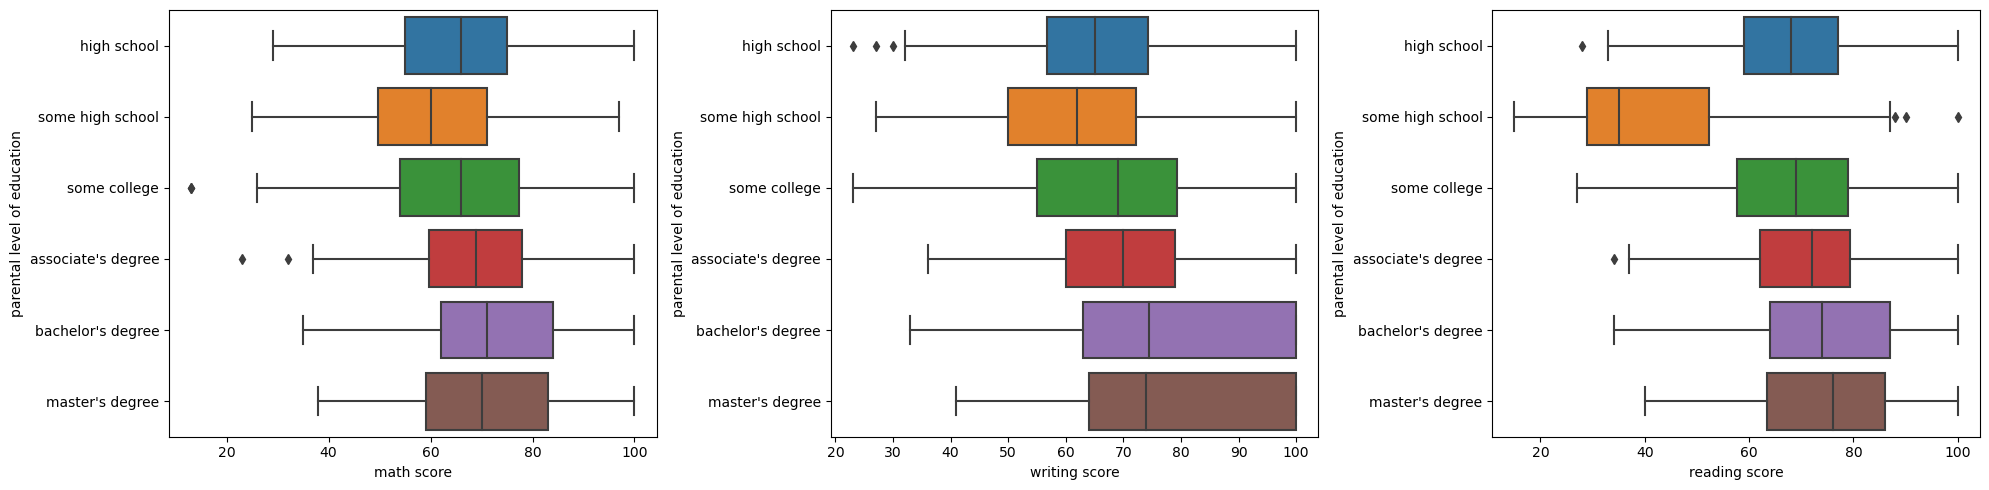

lunch


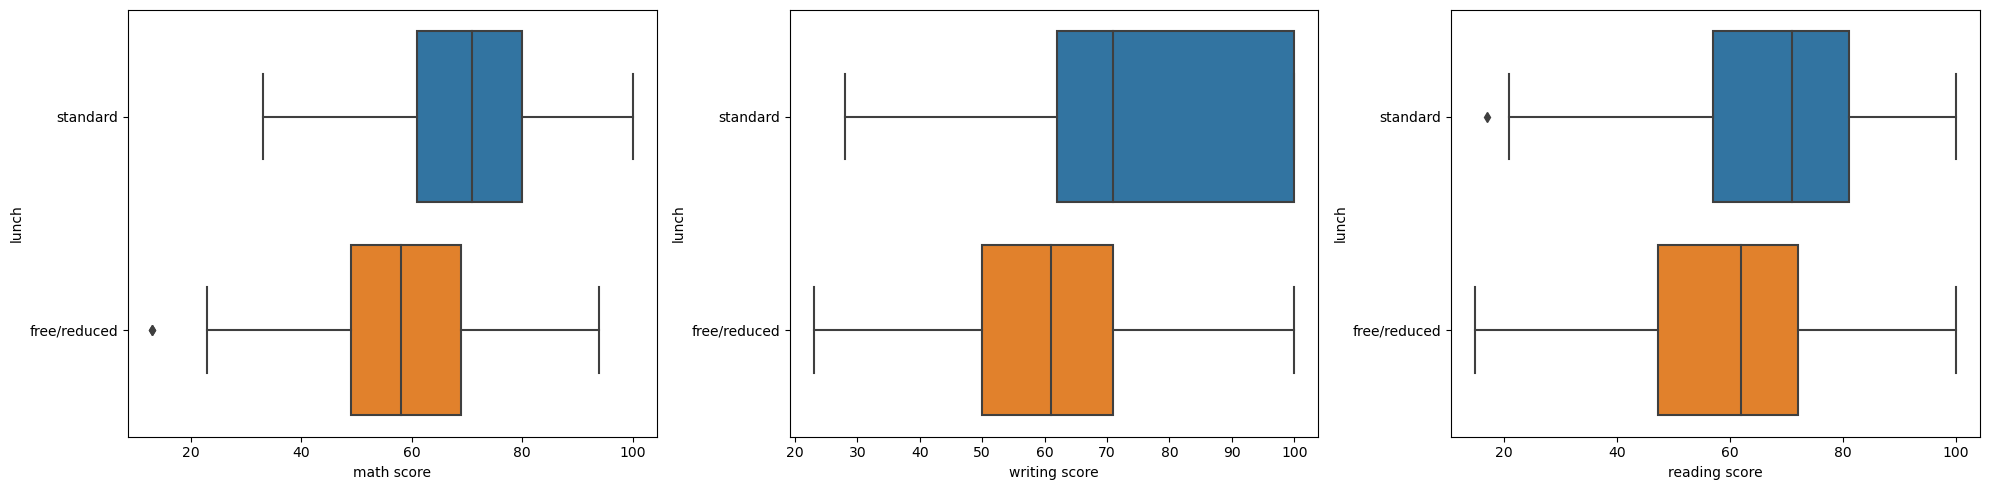

test preparation course


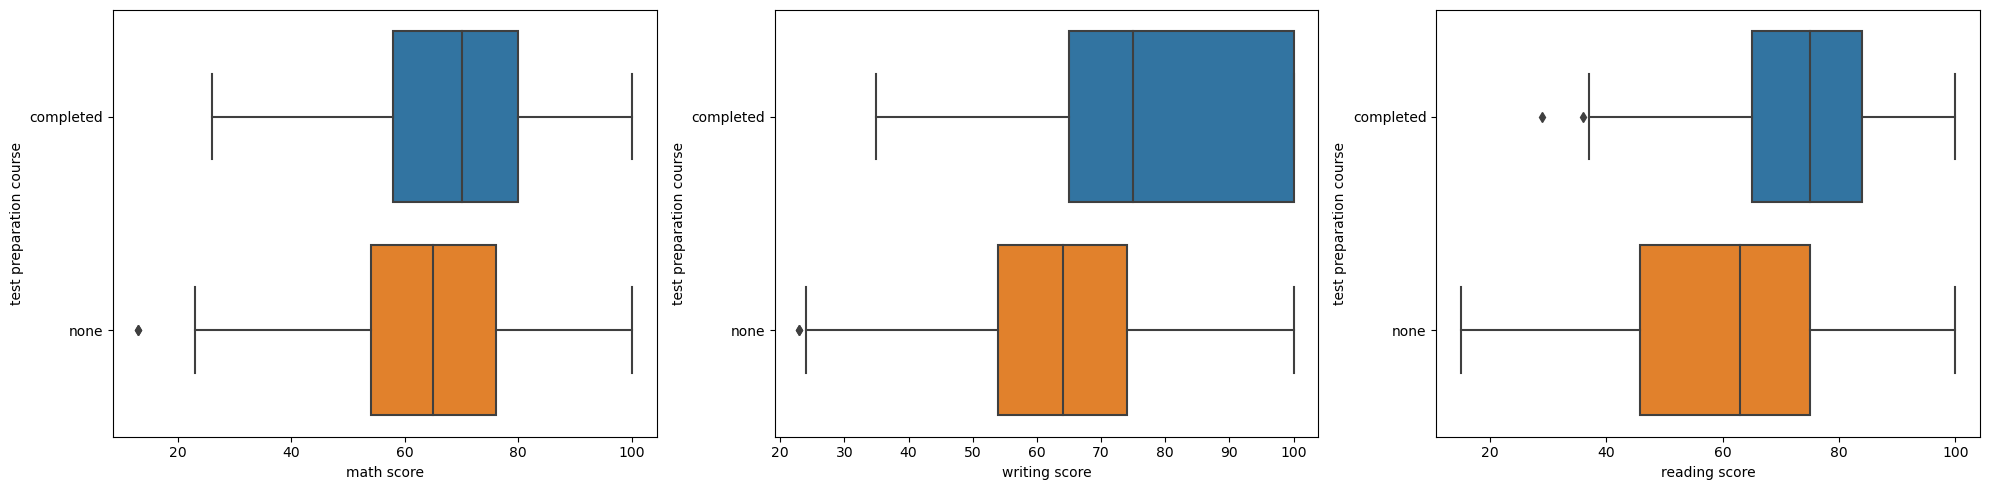

In [57]:
for col in df.columns: 
    if df[col].dtype == 'O':
        print(col)
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5)) 
        sns.boxplot(x="math score", y=col, data=df, ax=ax1)
        sns.boxplot(x="writing score", y=col, data=df, ax=ax2)
        sns.boxplot(x="reading score", y=col, data=df, ax=ax3)   
        plt.tight_layout()  
        plt.show() 

In [ ]:
#Dentro del análisis realizado observamos que el nivel de educación de los padres, los cursos de preparación para los exámenes son variables que vienen impactando 

In [ ]:
#adicionalmente vamos a revisar el impacto del lunch

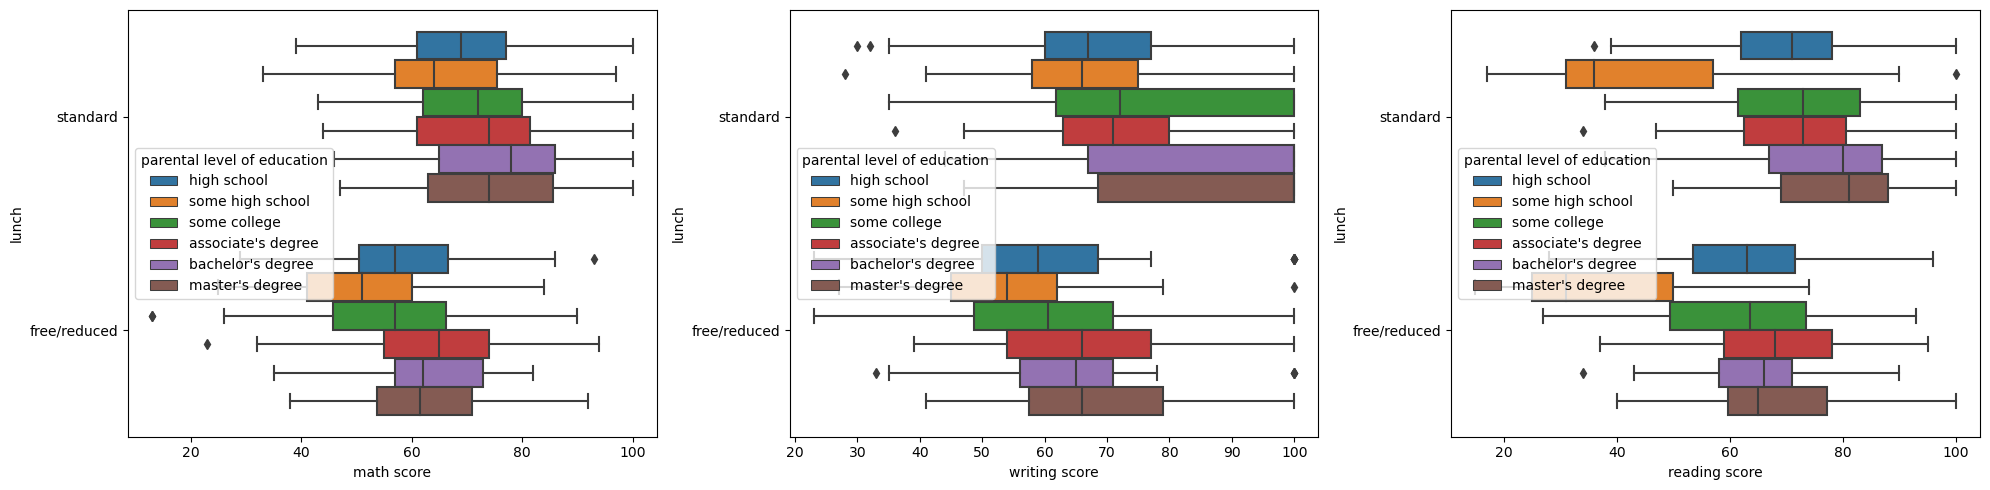

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5)) 

#Body of the figure to build and the data to use
sns.boxplot(x=df['math score'], y=df['lunch'], ax=ax1, hue=df['parental level of education'])
sns.boxplot(x=df['writing score'], y=df['lunch'], ax=ax2, hue=df['parental level of education'])
sns.boxplot(x=df['reading score'], y=df['lunch'], ax=ax3, hue=df['parental level of education'])

plt.tight_layout()
#Save or show
plt.show()

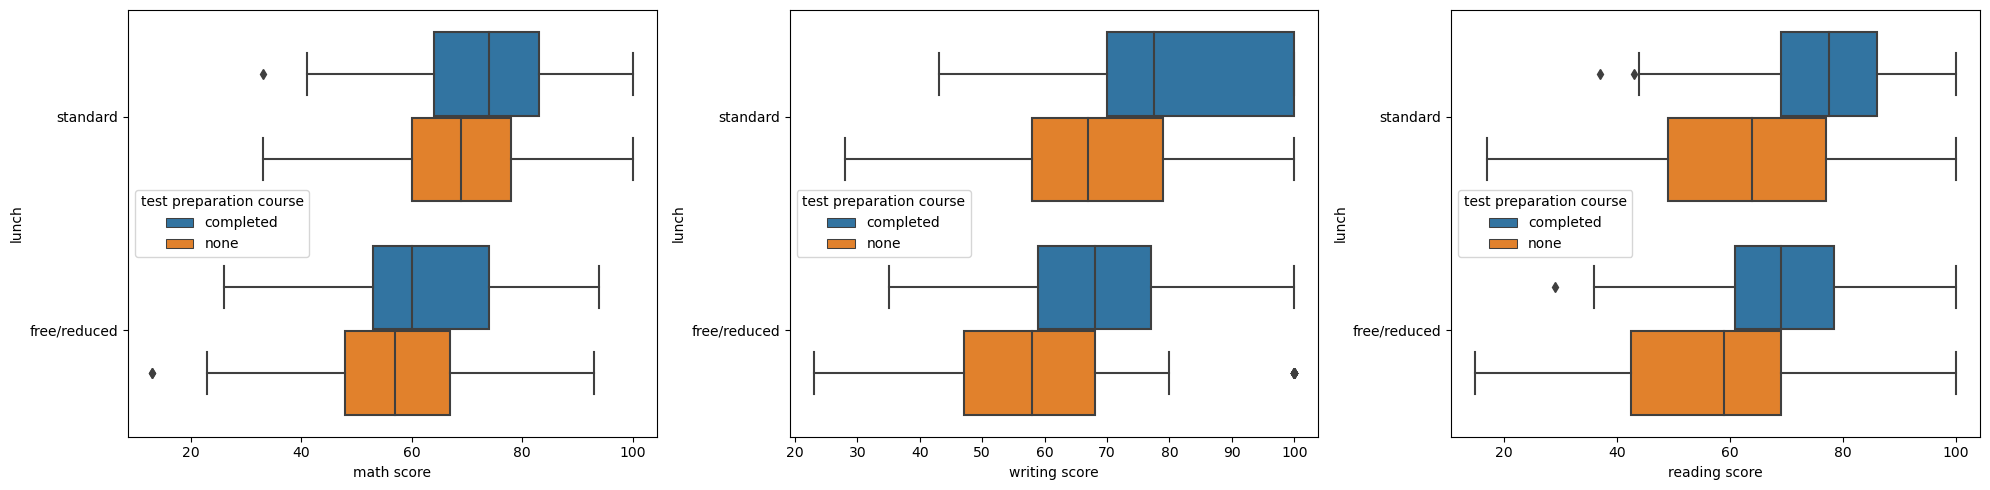

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5)) 

#Body of the figure to build and the data to use
sns.boxplot(x=df['math score'], y=df['lunch'], ax=ax1, hue=df['test preparation course'])
sns.boxplot(x=df['writing score'], y=df['lunch'], ax=ax2, hue=df['test preparation course'])
sns.boxplot(x=df['reading score'], y=df['lunch'], ax=ax3, hue=df['test preparation course'])

plt.tight_layout()
#Save or show
plt.show()

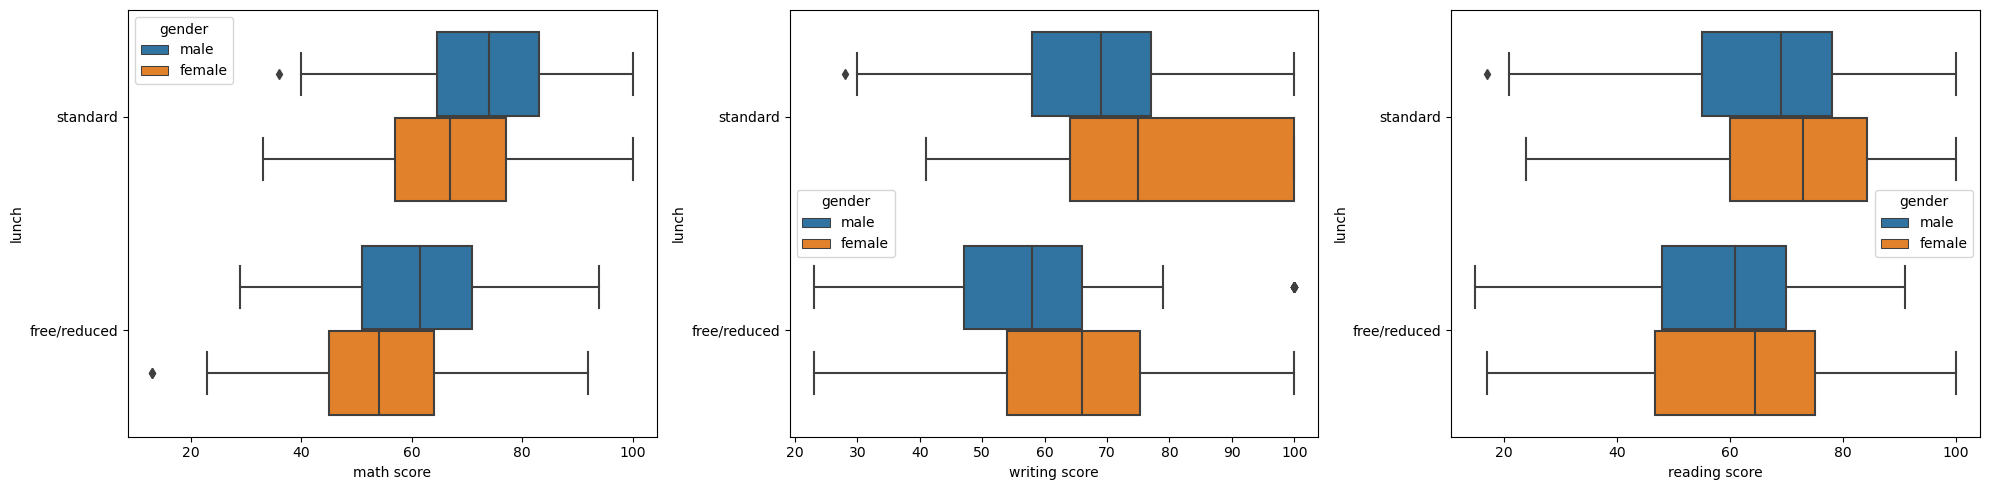

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5)) 

#Body of the figure to build and the data to use
sns.boxplot(x=df['math score'], y=df['lunch'], ax=ax1, hue=df['gender'])
sns.boxplot(x=df['writing score'], y=df['lunch'], ax=ax2, hue=df['gender'])
sns.boxplot(x=df['reading score'], y=df['lunch'], ax=ax3, hue=df['gender'])

plt.tight_layout()
#Save or show
plt.show()

# PROCEDEMOS A ANALIZAR LAS VARIABLES A TRAVES DE LA COLUMNA GÉNERO

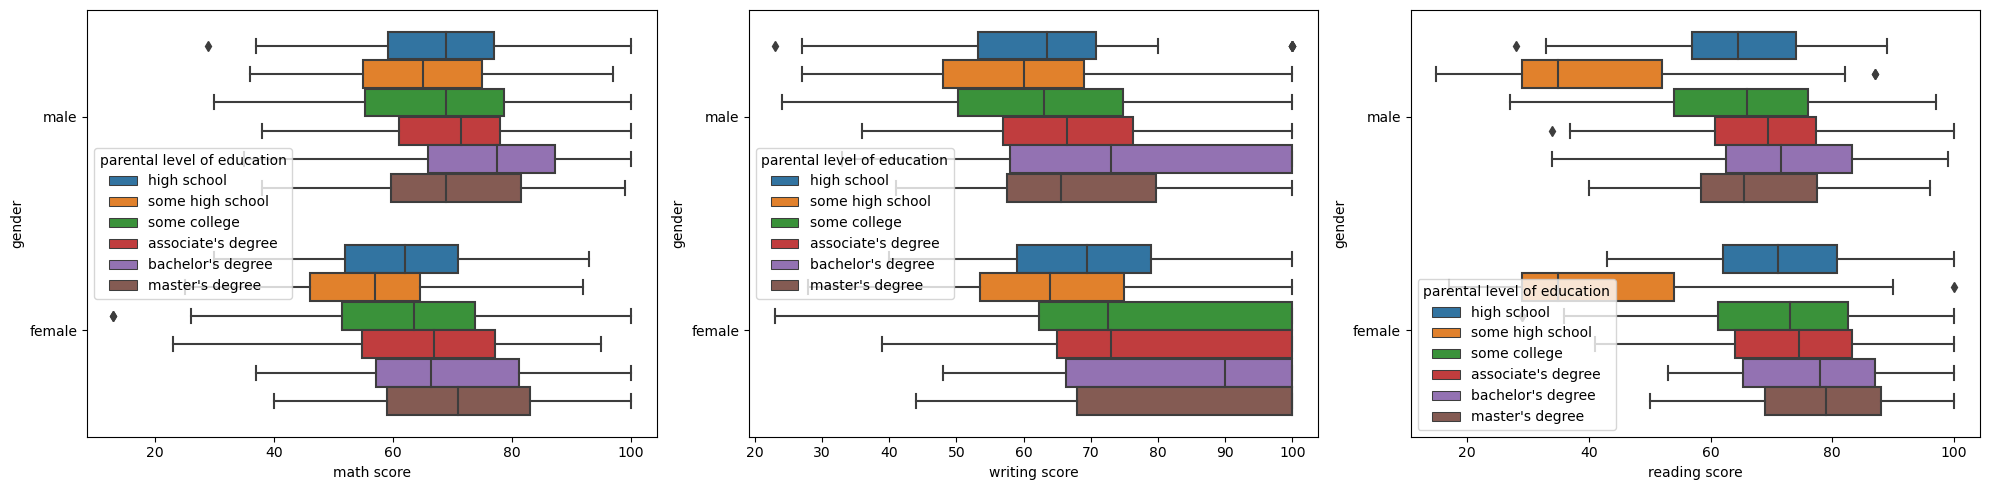

In [61]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5)) 

#Body of the figure to build and the data to use
sns.boxplot(x=df['math score'], y=df['gender'], ax=ax1, hue=df['parental level of education'])
sns.boxplot(x=df['writing score'], y=df['gender'], ax=ax2, hue=df['parental level of education'])
sns.boxplot(x=df['reading score'], y=df['gender'], ax=ax3, hue=df['parental level of education'])

plt.tight_layout()
#Save or show
plt.show()

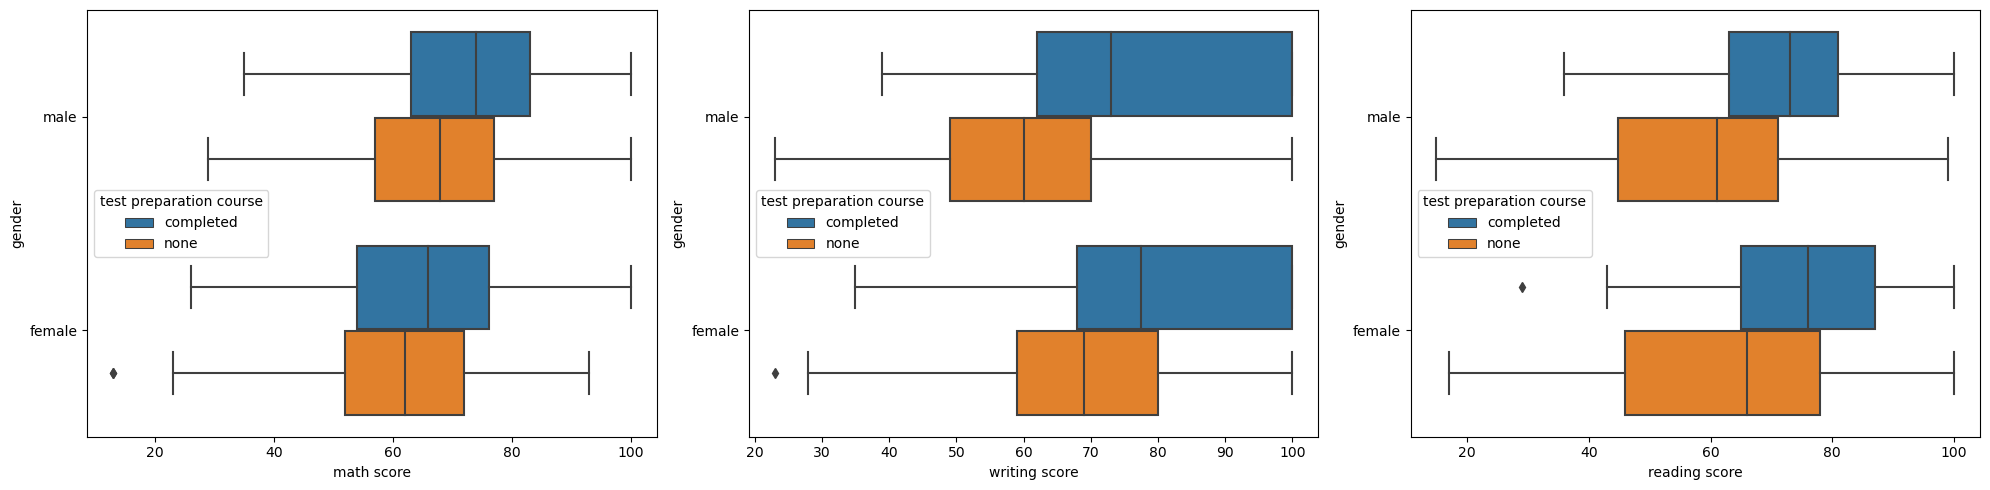

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5)) 

#Body of the figure to build and the data to use
sns.boxplot(x=df['math score'], y=df['gender'], ax=ax1, hue=df['test preparation course'])
sns.boxplot(x=df['writing score'], y=df['gender'], ax=ax2, hue=df['test preparation course'])
sns.boxplot(x=df['reading score'], y=df['gender'], ax=ax3, hue=df['test preparation course'])

plt.tight_layout()
#Save or show
plt.show()

In [ ]:
PROCEDEMOS A ANALIZAR LAS VARIABLES A TRAVES DE LA COLUMNA PREPARACIÓN PARA LOS EXÁMENES

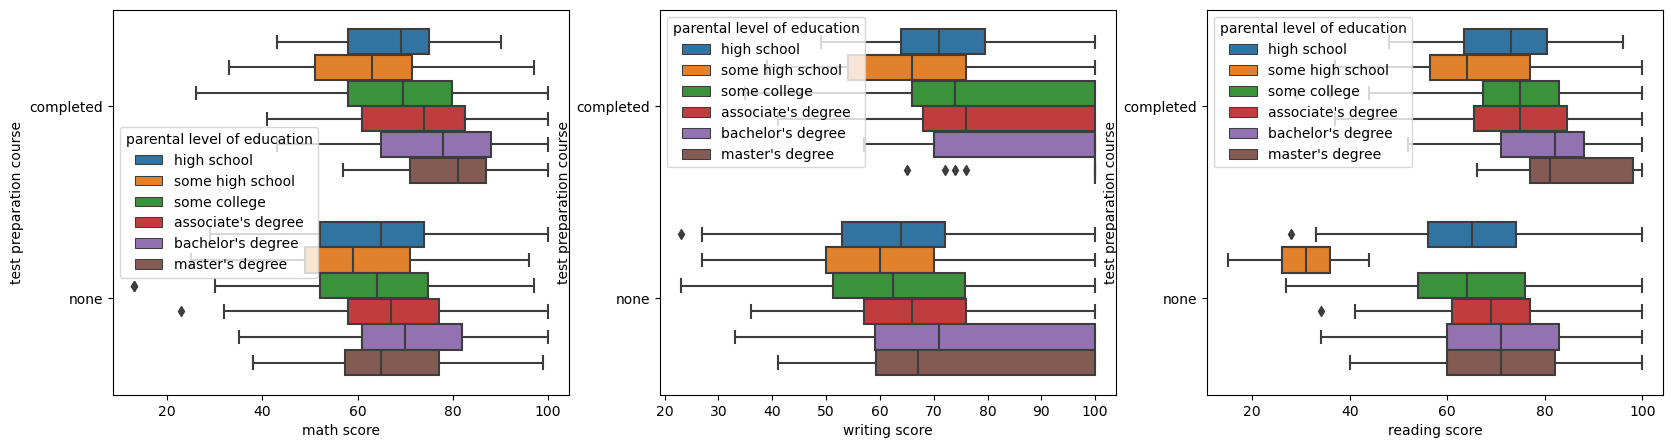

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5)) 

#Body of the figure to build and the data to use
sns.boxplot(x=df['math score'], y=df['test preparation course'], ax=ax1, hue=df['parental level of education'])
sns.boxplot(x=df['writing score'], y=df['test preparation course'], ax=ax2, hue=df['parental level of education'])
sns.boxplot(x=df['reading score'], y=df['test preparation course'], ax=ax3, hue=df['parental level of education'])


#Save or show
plt.show()